In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

# Load and cleaning data

In [105]:
#for comapring if the cleaning has been done correctly or not
directory_path = r"C:\Users\Mahi\ImpAthleteData"

dfs = {}

for filename in os.listdir(directory_path):
    df_key = os.path.splitext(filename)[0] #getting the filename for it to be dataframe name
    
    file_path = os.path.join(directory_path,filename)
    
    dfs[df_key] = pd.read_csv(file_path)

In [4]:
dfs.keys()

dict_keys(['under 18 100m men', 'under 18 200m men', 'under 18 400m men', 'under 20 100m men', 'under 20 200m men', 'under 20 400m men', 'Women U18 100m', 'Women U18 200m', 'Women U20 100m', 'Women u20 200m', 'Women u20 400m'])

In [38]:
dfs['under 18 100m men']

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Name,DOB,State,Reaction time,Performance,Round type,Heat no
1,1 ANSHU RAJAK,14-07-2007,UTTAR PRADESH,+0.2m/s,10.67,Final,1
2,2 JASON CASTELINO,11-12-2006,MAHARASHTRA,+0.2m/s,10.81,Final,1
3,3 J.GOKUL PANDIYAN,04-01-2006,TAMIL NADU,+0.2m/s,10.82,Final,1
4,4 GOWTHAM ALLURI,28-12-2005,TELANGANA,+0.2m/s,10.84,Final,1
...,...,...,...,...,...,...,...
61,3 PRATIK MAHARANA,08-06-2007,ODISHA,+1.1m/s,11.10,Prelims,5
62,4 AYUSH KRISHNA .,28-05-2007,KERALA,+1.1m/s,11.22,Prelims,5
63,5 PARTHA CHANGMAI,09-01-2007,ASSAM,+1.1m/s,11.30,Prelims,5
64,SANDEEP KUMAR,10-12-2006,JHARKHAND,NaN,DNS,Prelims,5


In [106]:
def preprocess_table(df):
    # Identify the row number containing column names
    header_row = 0
    if df.iloc[0].isnull().all():
        header_row = 1

    # Assign columns based on the identified row
    df.columns = df.iloc[header_row]

    # Reset the column index after assigning columns
    df.columns = df.columns.get_level_values(0)

    # Drop rows until the header row
    df = df.iloc[header_row + 1:].reset_index(drop=True)

    # Reset the index after dropping rows without keeping the old index as a new column
    df = df.reset_index(drop=True)

    # Drop unnecessary columns
    columns_to_keep = []
    for column in df.columns:
        # Check if the data type of the column allows string operations
        if df[column].dtype == 'O' or pd.api.types.is_string_dtype(df[column]):
            # Handle non-string (float) values
            df[column] = df[column].astype(str)
            if 'id' not in column.lower() and 'nan' not in column.lower() and df[column].isnull().sum() / len(df) <= 0.9:
                columns_to_keep.append(column)

    # Filter the DataFrame to keep only the selected columns
    df = df[columns_to_keep]
    

    return df

In [107]:
def preprocess_data(cleaned_df):
    
    #Stripping name column of numbers and backslash n
    cleaned_df['Name'] = cleaned_df['Name'].str.replace(r'\\n|\d', '', regex=True)
    
    #Changing datatype of birth column
    cleaned_df['DOB'] = pd.to_datetime(cleaned_df['DOB'])
    
    #Handling reaction column if any and removing plus symbol and string , then data type conversion
    if 'Reaction time' in cleaned_df.columns:
        cleaned_df['Reaction time'] = cleaned_df['Reaction time'].str.replace(r'[^\d.]', '', regex=True)
        cleaned_df['Reaction time'] = pd.to_numeric(cleaned_df['Reaction time'], errors='coerce')

    # Performance column remove characters and datatype conversion
    cleaned_df['Performance'] = cleaned_df['Performance'].str.replace(r'[^\d.]', '', regex=True)
    cleaned_df['Performance'] = pd.to_numeric(cleaned_df['Performance'], errors='coerce')
    
    return cleaned_df

In [108]:
cleaned_dfs = {}
def load_and_clean_all_data(directory_path):
    # Create an empty dictionary to store cleaned dataframes
    
    # Loop through each file in the directory
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.csv'):
            # Construct the full file path
            file_path = os.path.join(directory_path, file_name)
            
            # Extract the table name from the file name (adjust this based on your naming convention)
            table_name = file_name.split('.')[0]
            
            print(f"Processing file: {file_path}, Table Name: {table_name}")

            # Load the data
            df = pd.read_csv(file_path, header=None)
            
            # Preprocess the table
            cleaned_df = preprocess_table(df)
            
            # Now preprocess the data within the table such as datatype conversion etc
            final_df = preprocess_data(cleaned_df)
            
            # Print the number of rows and columns after preprocessing (for debugging)
            print(f"After preprocessing - Rows: {len(cleaned_df)}, Columns: {len(cleaned_df.columns)}")

            # Store the cleaned dataframe in the dictionary
            cleaned_dfs[table_name] = final_df
    
    return cleaned_dfs

# Run the function
result = load_and_clean_all_data(directory_path)
print(result)

Processing file: C:\Users\Mahi\ImpAthleteData\under 18 100m men.csv, Table Name: under 18 100m men
After preprocessing - Rows: 65, Columns: 7
Processing file: C:\Users\Mahi\ImpAthleteData\under 18 200m men.csv, Table Name: under 18 200m men
After preprocessing - Rows: 70, Columns: 7
Processing file: C:\Users\Mahi\ImpAthleteData\under 18 400m men.csv, Table Name: under 18 400m men
After preprocessing - Rows: 64, Columns: 6
Processing file: C:\Users\Mahi\ImpAthleteData\under 20 100m men.csv, Table Name: under 20 100m men
After preprocessing - Rows: 62, Columns: 7
Processing file: C:\Users\Mahi\ImpAthleteData\under 20 200m men.csv, Table Name: under 20 200m men
After preprocessing - Rows: 72, Columns: 7
Processing file: C:\Users\Mahi\ImpAthleteData\under 20 400m men.csv, Table Name: under 20 400m men
After preprocessing - Rows: 51, Columns: 6
Processing file: C:\Users\Mahi\ImpAthleteData\Women U18 100m.csv, Table Name: Women U18 100m
After preprocessing - Rows: 52, Columns: 7
Processing f

C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\2519893820.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cleaned_df['DOB'] = pd.to_datetime(cleaned_df['DOB'])
C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\2519893820.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cleaned_df['DOB'] = pd.to_datetime(cleaned_df['DOB'])
C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\2519893820.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cleaned_df['DOB'] = pd.to_datetime(cleaned_df['DOB'])
C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\2519893820.py:7

After preprocessing - Rows: 64, Columns: 7
Processing file: C:\Users\Mahi\ImpAthleteData\Women U20 100m.csv, Table Name: Women U20 100m
After preprocessing - Rows: 52, Columns: 7
Processing file: C:\Users\Mahi\ImpAthleteData\Women u20 200m.csv, Table Name: Women u20 200m
After preprocessing - Rows: 49, Columns: 7
Processing file: C:\Users\Mahi\ImpAthleteData\Women u20 400m.csv, Table Name: Women u20 400m
After preprocessing - Rows: 25, Columns: 6
{'under 18 100m men': 1                           Name        DOB          State  Reaction time  \
0                    ANSHU RAJAK 2007-07-14  UTTAR PRADESH            0.2   
1                JASON CASTELINO 2006-11-12    MAHARASHTRA            0.2   
2               J.GOKUL PANDIYAN 2006-04-01     TAMIL NADU            0.2   
3                 GOWTHAM ALLURI 2005-12-28      TELANGANA            0.2   
4         SANGINENI HARSH VARDHA 2006-12-19      TELANGANA            0.2   
..                           ...        ...            ...       

C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\2519893820.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cleaned_df['DOB'] = pd.to_datetime(cleaned_df['DOB'])
C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\2519893820.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cleaned_df['DOB'] = pd.to_datetime(cleaned_df['DOB'])


In [13]:
for df_name,df in cleaned_dfs.items():
    print(cleaned_dfs[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           65 non-null     object        
 1   DOB            65 non-null     datetime64[ns]
 2   State          65 non-null     object        
 3   Reaction time  61 non-null     float64       
 4   Performance    61 non-null     float64       
 5   Round type     65 non-null     object        
 6   Heat no        65 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 3.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           70 non-null     object        
 1   DOB            70 non-null     datetime64[ns]
 2   State          70 non-null     object        
 3   R

In [9]:
cleaned_dfs['Women U18 200m'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           64 non-null     object        
 1   DOB            64 non-null     datetime64[ns]
 2   State          64 non-null     object        
 3   Reaction time  59 non-null     float64       
 4   Performance    59 non-null     float64       
 5   Round          64 non-null     object        
 6   Heat no.       64 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 3.6+ KB


# Descriptive statistics : Of reaction time and performance by round type and state

In [109]:
#Desc stats based on prelims,semis and finals

for df_name,df in cleaned_dfs.items(): # corection made - wrong traversal of dictionaries
    
    #Renaming round type column in some tables to round
    
    if 'Round type' in cleaned_dfs[df_name].columns:
        cleaned_dfs[df_name].rename(columns = {'Round type':'Round'}, inplace = True)
        
    df.columns = df.columns.str.strip()
        
    #print(df_name)
    print(f"DataFrame: {df_name}")
    print(f"Columns: {df.columns}")
    
    #replace semis with semi 
    if 'Round' in df.columns:
        df['Round'] = df['Round'].str.replace('Semis', 'Semi', regex=True)
        
    if 'Reaction time' in cleaned_dfs[df_name].columns:
        grped = df.groupby(['Round'])[['Reaction time']].describe() 
        # when passing multiple columns , it shd be within another list
        grped1 = df.groupby(['Round'])[['Performance']].describe()
        print(grped)
        print(grped1)
    else:
        grped = df.groupby(['Round'])['Performance'].describe()
        print(grped)

DataFrame: under 18 100m men
Columns: Index(['Name', 'DOB', 'State', 'Reaction time', 'Performance', 'Round',
       'Heat no'],
      dtype='object', name=1)
1       Reaction time                                                 
                count      mean           std  min  25%  50%  75%  max
Round                                                                 
Final             8.0  0.200000  2.967196e-17  0.2  0.2  0.2  0.2  0.2
Prelims          31.0  0.835484  4.694311e-01  0.1  0.6  0.9  1.1  1.5
Semi             22.0  0.195455  1.430194e-01  0.1  0.1  0.1  0.4  0.4
1       Performance                                                       \
              count       mean       std    min      25%    50%      75%   
Round                                                                      
Final           8.0  10.856250  0.109144  10.67  10.8175  10.85  10.8875   
Prelims        31.0  11.266452  0.349786  10.64  11.0650  11.24  11.4150   
Semi           22.0  11.323636  0.6

In [65]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'A': np.random.randn(100),
    'B': np.random.randint(0, 2, 100),
    'C': np.random.choice(['X', 'Y', 'Z'], 100)
}

df = pd.DataFrame(data)

# Get the descriptive statistics using describe
desc_stats = df.describe()

# Define a custom style function
def style_table(val):
    return 'font-weight: bold; background-color: lightblue;'

# Apply the style to the descriptive statistics table
styled_desc_stats = desc_stats.style.applymap(style_table)

# Display the styled table
styled_desc_stats


,A,B
count,100.000000,100.000000
mean,0.164588,0.470000
std,1.055681,0.501614
min,-2.561687,0.000000
25%,-0.635092,0.000000
50%,0.148880,0.000000
75%,0.820418,1.000000
max,2.625475,1.000000


# By round 

In [110]:

# Define a custom style function
def style_table(val):
    return 'font-weight: bold; background-color: lightblue;'

# Apply the style to the descriptive statistics tables for each DataFrame
styled_tables = {}

for table_name, df in cleaned_dfs.items():
    if 'Reaction time' in cleaned_dfs[table_name].columns:
        desc_stats_reac = df.groupby(['Round'])[['Reaction time']].describe() 
        styled_desc_stats_reac = desc_stats_reac.style.applymap(style_table)
        styled_tables[f"{table_name}_Reaction"] = styled_desc_stats_reac # remeber to name them seperately 
    
    desc_stats_perf = df.groupby(['Round'])[['Performance']].describe()
    styled_desc_stats_perf = desc_stats_perf.style.applymap(style_table)
    styled_tables[f"{table_name}_Performance"] = styled_desc_stats_perf

# Display the styled tables
for table_name, styled_table in styled_tables.items():
    print(f"Table: {table_name}")
    display(styled_table)



Table: under 18 100m men_Reaction


Table: under 18 100m men_Performance


Table: under 18 200m men_Reaction


Table: under 18 200m men_Performance


Table: under 18 400m men_Performance


Table: under 20 100m men_Performance


Table: under 20 200m men_Reaction


Table: under 20 200m men_Performance


Table: under 20 400m men_Performance


Table: Women U18 100m_Reaction


Table: Women U18 100m_Performance


Table: Women U18 200m_Reaction


Table: Women U18 200m_Performance


Table: Women U20 100m_Performance


Table: Women u20 200m_Reaction


Table: Women u20 200m_Performance


Table: Women u20 400m_Performance


In [ ]:
if 'Reaction time' in cleaned_dfs[df_name].columns:
        grped = df.groupby(['Round'])[['Reaction time']].describe() 
        # when passing multiple columns , it shd be within another list
        grped1 = df.groupby(['Round'])[['Performance']].describe()
        print(grped)
        print(grped1)
    else:
        grped = df.groupby(['Round'])['Performance'].describe()
        print(grped)

# By state and round

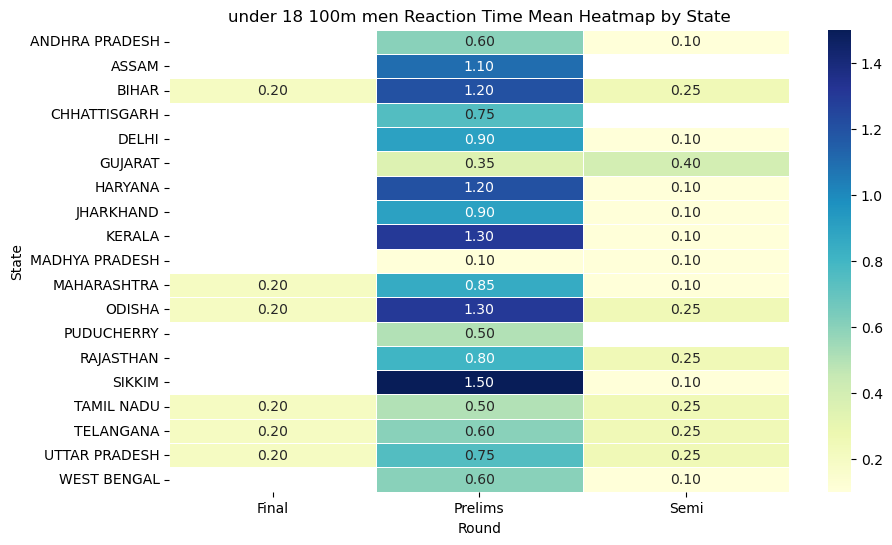

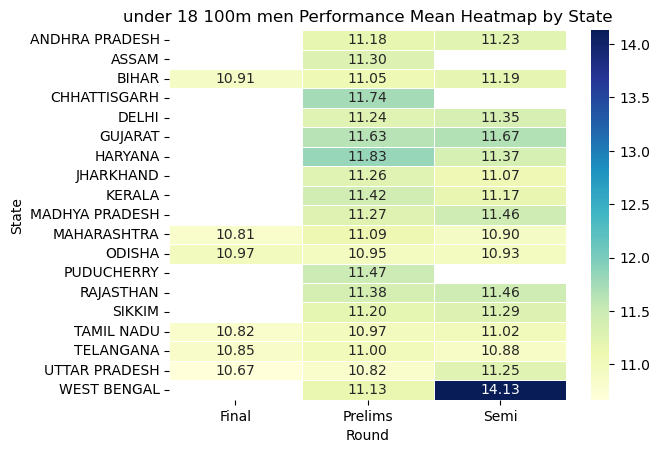

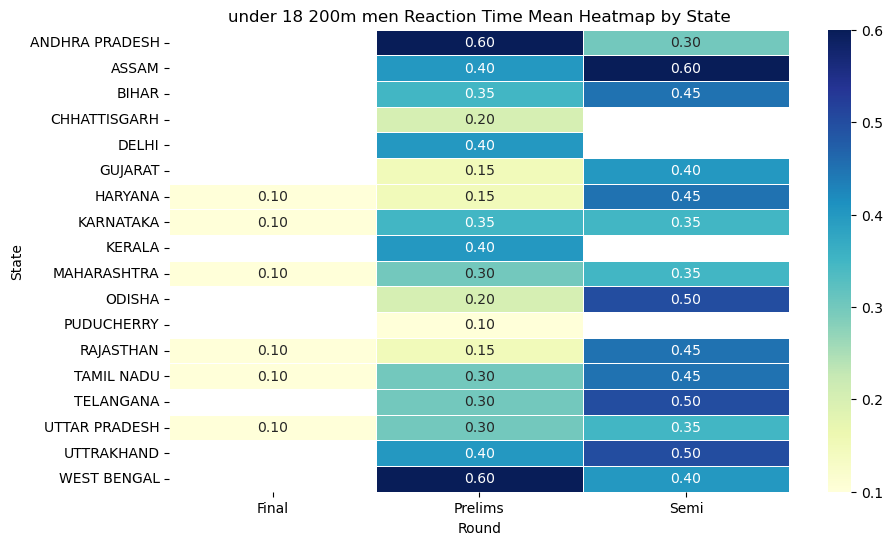

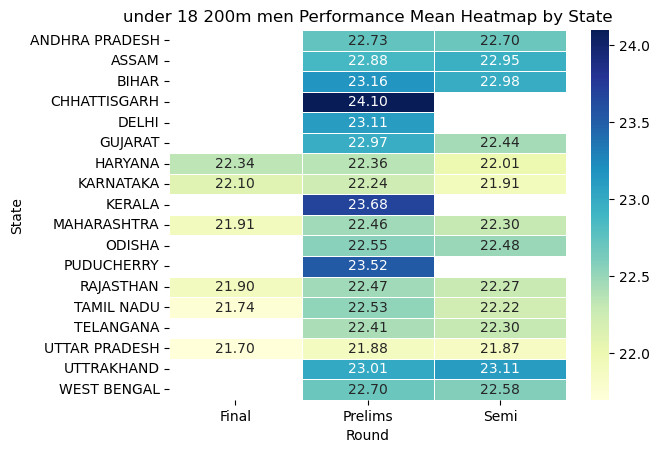

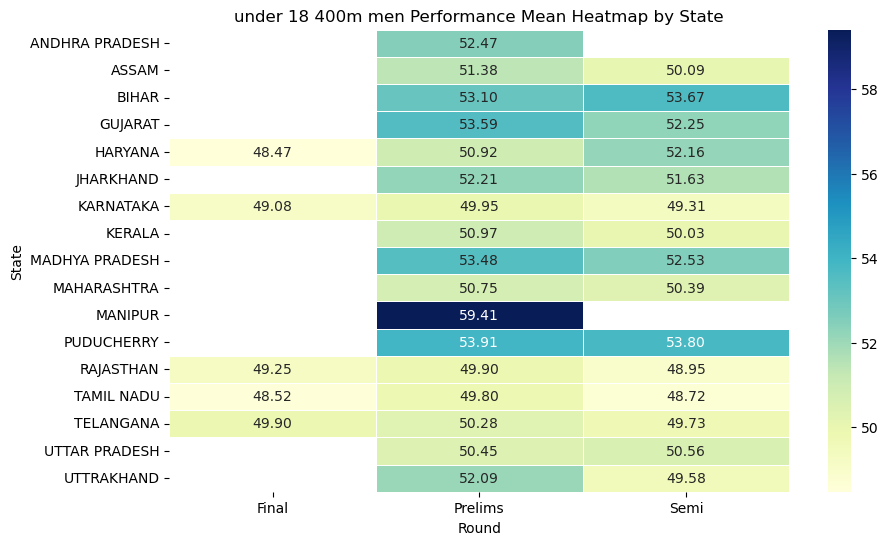

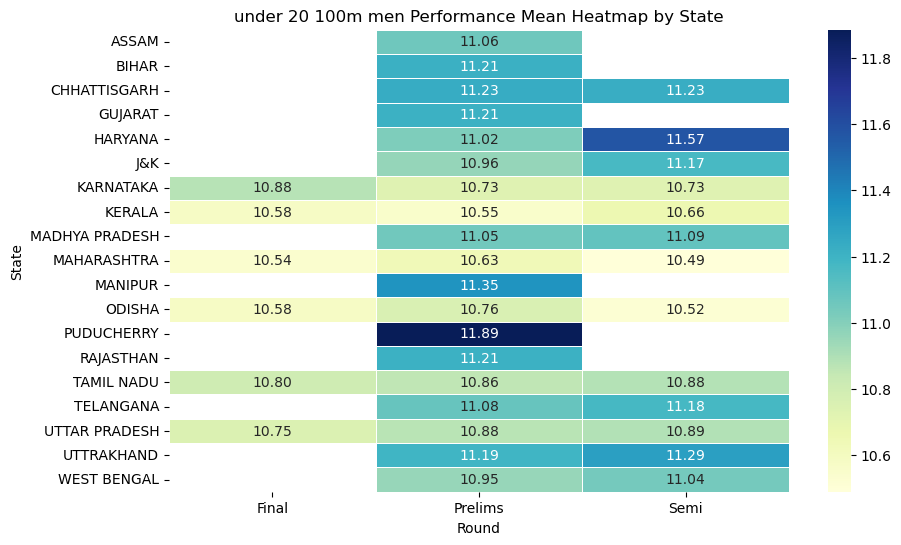

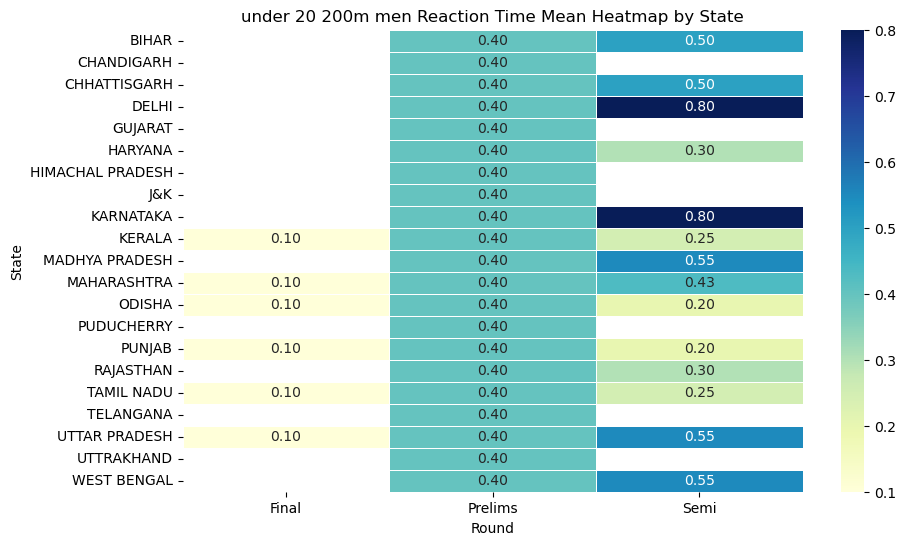

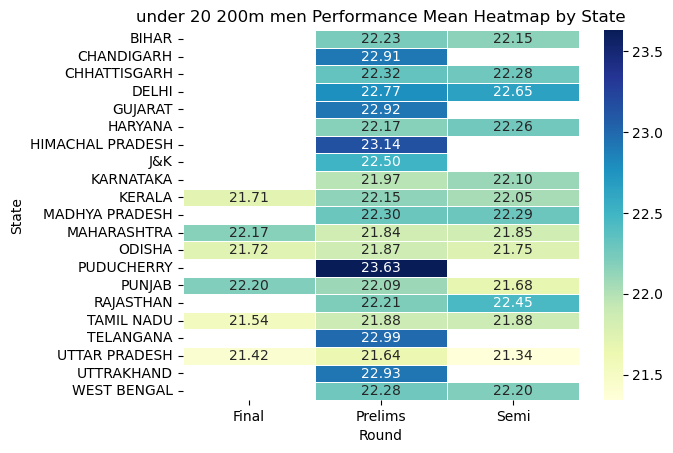

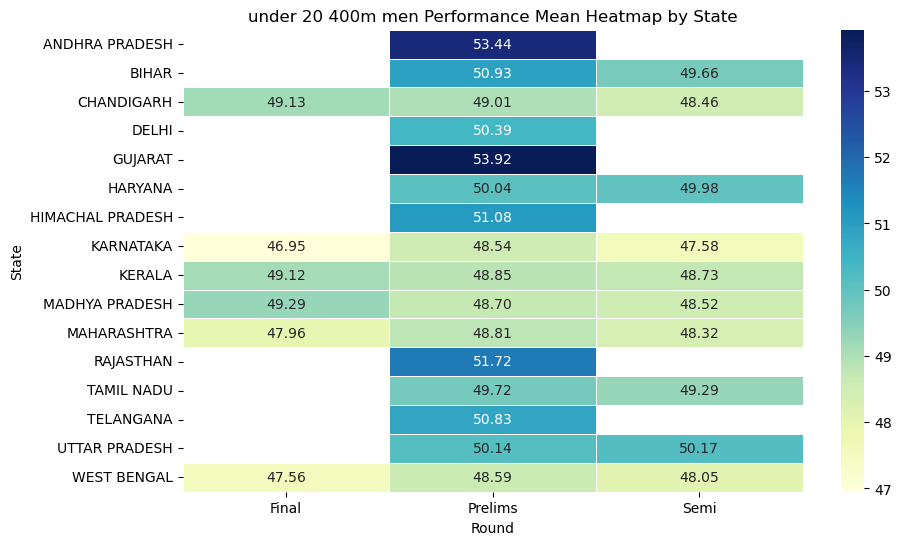

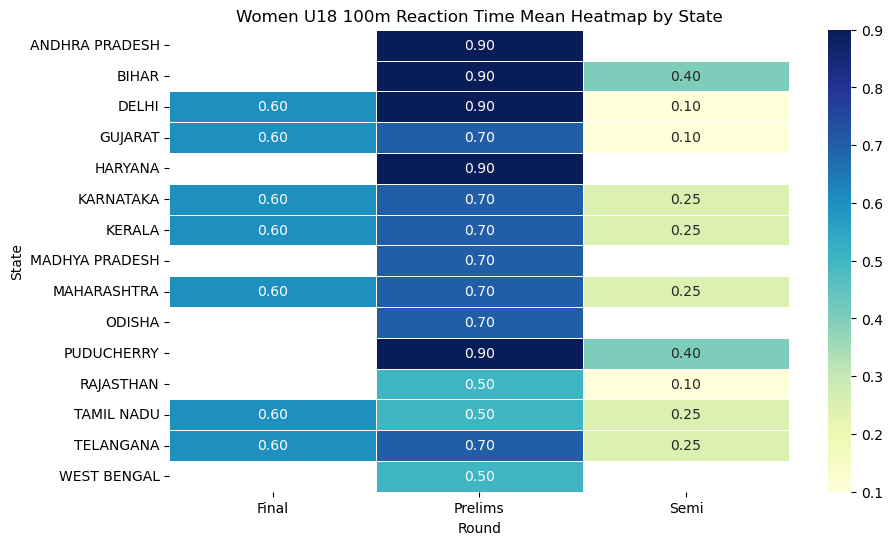

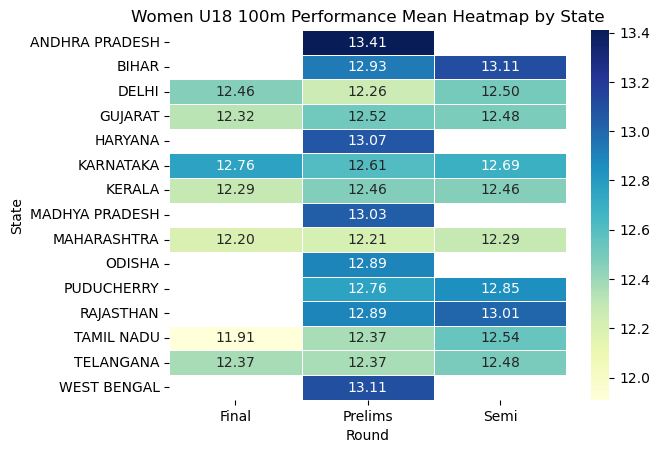

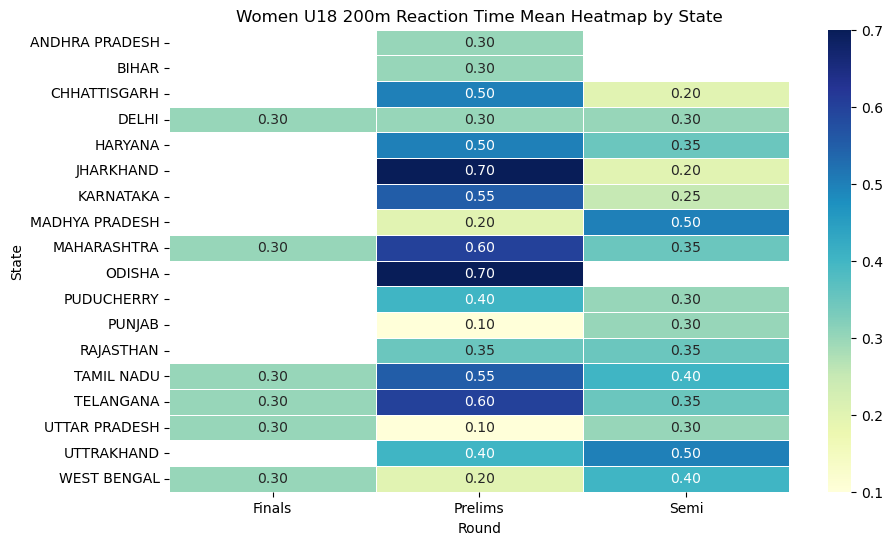

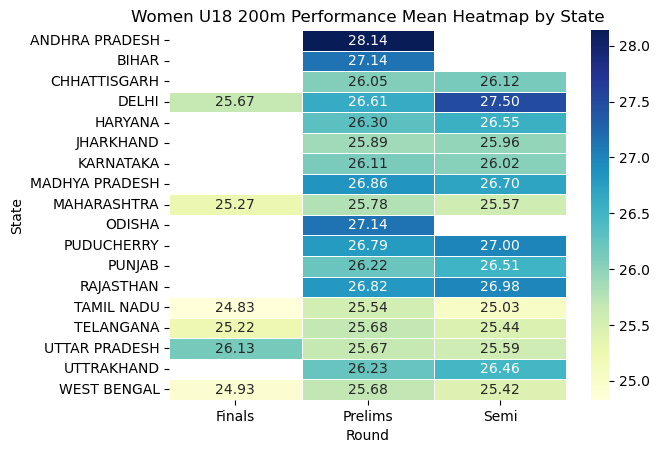

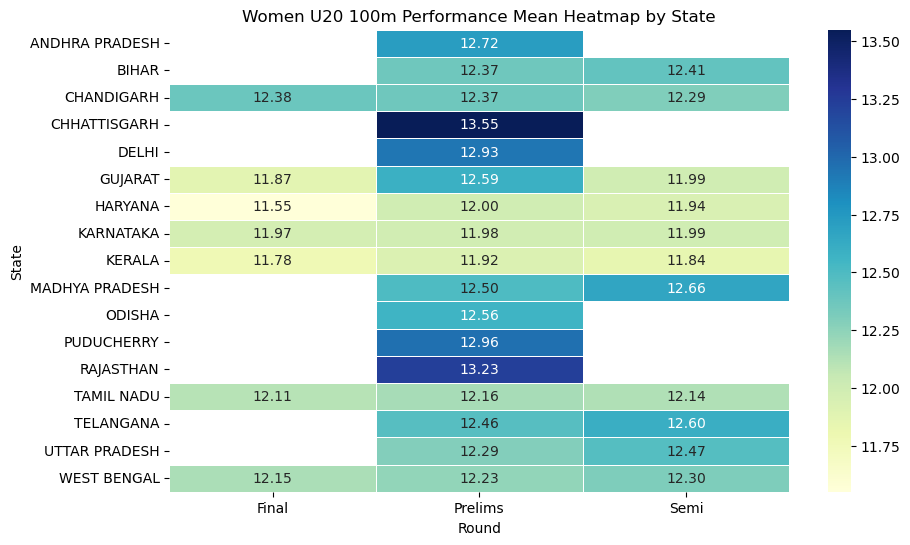

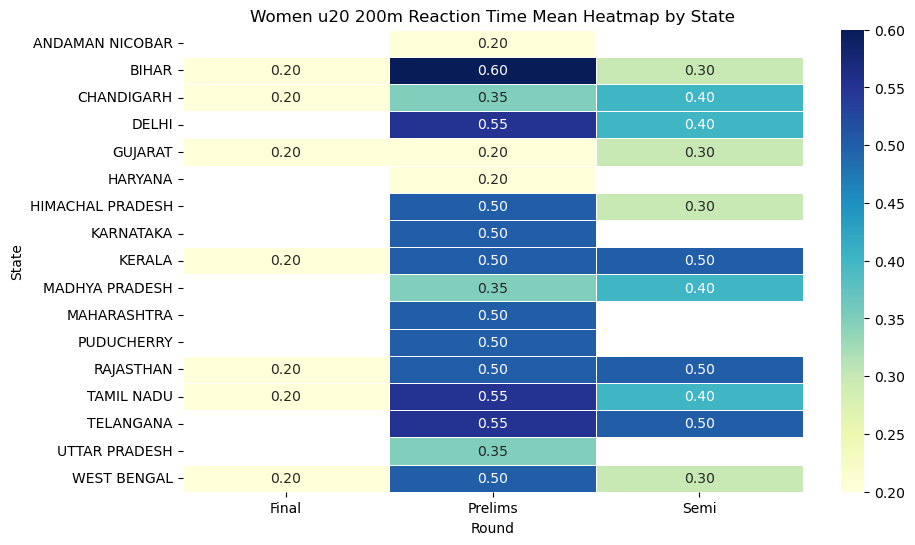

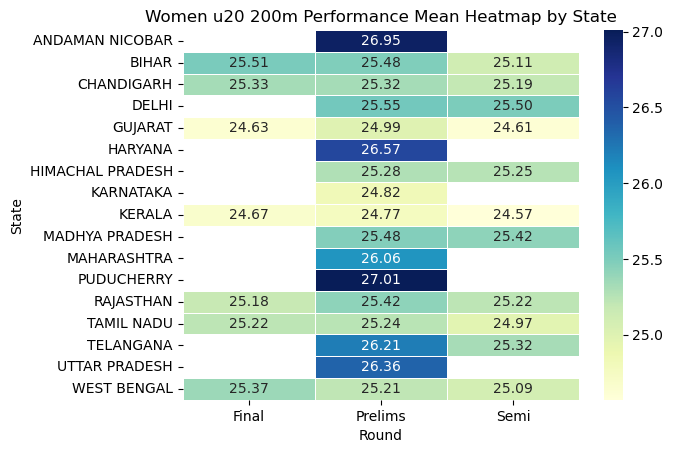

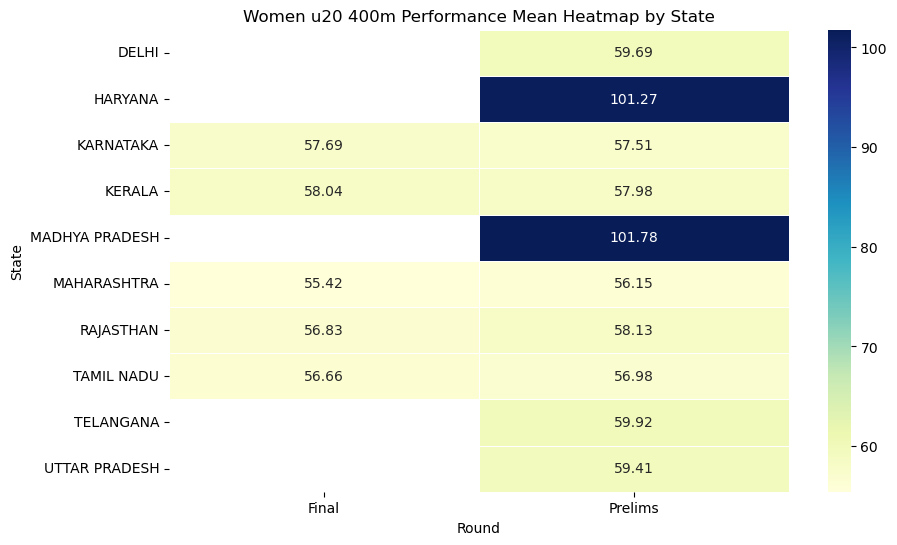

In [111]:
for table_name, df in cleaned_dfs.items():
    plt.figure(figsize=(10, 6))

    if 'Reaction time' in df.columns:
        sns.heatmap(df.pivot_table(index='State', columns='Round', values='Reaction time', aggfunc='mean'), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
        plt.title(f"{table_name} Reaction Time Mean Heatmap by State")
        plt.show()

    sns.heatmap(df.pivot_table(index='State', columns='Round', values='Performance', aggfunc='mean'), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
    plt.title(f"{table_name} Performance Mean Heatmap by State")
    plt.show()

# Heat analysis


**changing the column name**

In [112]:
for table_name, df in cleaned_dfs.items():
    # Check if 'Round type' exists in columns and rename it to 'Round'
    if 'Round type' in df.columns:
        df.rename(columns={'Round type': 'Round'}, inplace=True)

In [113]:
for table_name, df in cleaned_dfs.items():
    # Check if 'Round type' exists in columns and rename it to 'Round'
    if 'Heat no' in df.columns:
        df.rename(columns={'Heat no': 'Heatnumber'}, inplace=True)
    elif 'Heat no.' in df.columns:
        df.rename(columns={'Heat no.': 'Heatnumber'}, inplace=True)

In [114]:
for df_name,df in cleaned_dfs.items():
    print(cleaned_dfs[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           65 non-null     object        
 1   DOB            65 non-null     datetime64[ns]
 2   State          65 non-null     object        
 3   Reaction time  61 non-null     float64       
 4   Performance    61 non-null     float64       
 5   Round          65 non-null     object        
 6   Heatnumber     65 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 3.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           70 non-null     object        
 1   DOB            70 non-null     datetime64[ns]
 2   State          70 non-null     object        
 3   R

In [115]:
# Iterate over cleaned_dfs and rename 'Round ' column
for table_name, df in cleaned_dfs.items():
    # Check if 'Round ' column is present
    if 'Round ' in df.columns:
        # Rename the 'Round ' column to 'Round'
        df.rename(columns={'Round ': 'Round'}, inplace=True)
        print(f"Renamed 'Round ' column in {table_name}")

# Now you can proceed with the previous analysis code


In [116]:
# Iterate over cleaned_dfs
result_dict = {}
for table_name, df in cleaned_dfs.items():
    # Check if 'Round' column is present
    if 'Round' not in df.columns:
        # Handle the case when 'Round' is not present
        print(f"Warning: 'Round' column not found in {table_name}")
        continue

    # Group by 'Round' and 'Heatnumber' columns
    grouped_data = df.groupby(['Round', 'Heatnumber'])
    mean_performance = grouped_data['Performance'].mean()
    min_performance = grouped_data['Performance'].min()
    max_performance = grouped_data['Performance'].max()

    # Create a DataFrame with the results
    result_df = pd.DataFrame({
        'Mean Performance': mean_performance,
        'Fastest Performance': min_performance,
        'Slowest Performance': max_performance
    })

    # Store the result DataFrame in the dictionary
    result_dict[table_name] = result_df

# Display the results for each competition
for competition_name, result_df in result_dict.items():
    print(f"Competition: {competition_name}")
    print(result_df)
    print("\n")


Competition: under 18 100m men
                    Mean Performance  Fastest Performance  Slowest Performance
Round   Heatnumber                                                            
Final   1                  10.856250                10.67                11.06
Prelims 1                  11.270000                10.64                12.35
        2                  11.260000                10.79                11.62
        3                  11.388333                11.01                11.96
        4                  11.270000                10.96                11.49
        5                  11.118000                10.94                11.30
Semi    1                  11.554286                10.86                14.13
        2                  11.327143                10.84                11.87
        3                  11.118750                10.63                11.37


Competition: under 18 200m men
                    Mean Performance  Fastest Performance  Slowest 

# Age analysis

C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\551057195.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)
C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\551057195.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)


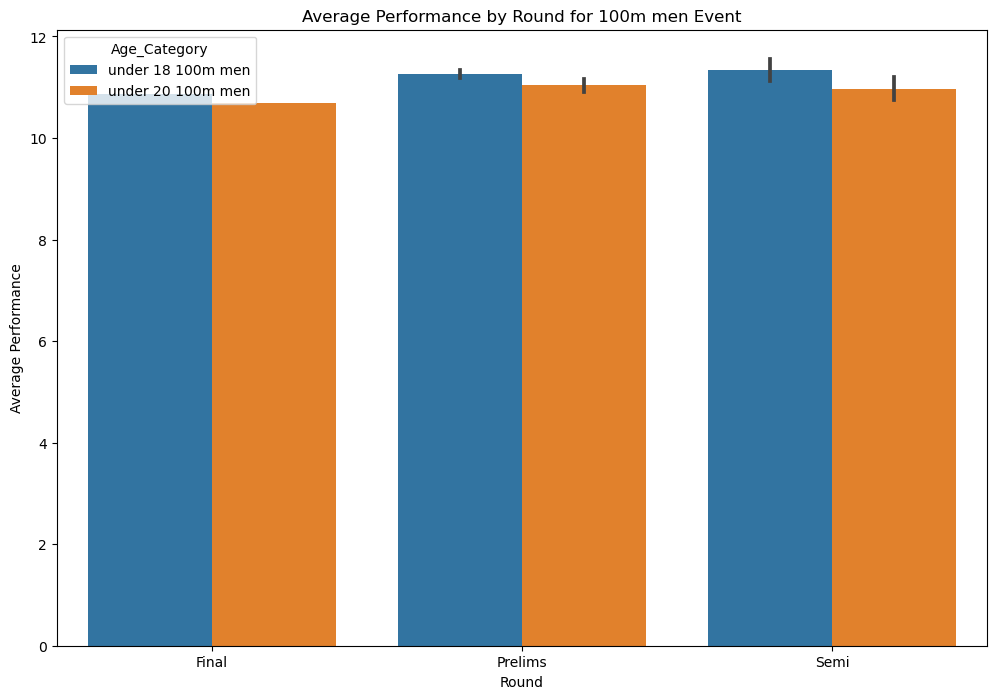

In [119]:
# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Iterate over cleaned_dfs
for table_name, df in cleaned_dfs.items():
    # Check if the table is related to the 100m event and either under 18 or under 20
    if '100m' in table_name and ('under 18' in table_name or 'under 20' in table_name):
        # Group by relevant columns for analysis
        grouped_data = df.groupby(['Round', 'Heatnumber'])

        # Calculate the mean performance for each group
        mean_performance = grouped_data['Performance'].mean().reset_index()

        # Add a column for the age category
        mean_performance['Age_Category'] = table_name

        # Append the data to the combined DataFrame
        combined_df = combined_df.append(mean_performance)

# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Round', y='Performance', hue='Age_Category', data=combined_df)

# Show the plot
plt.title('Average Performance by Round for 100m men Event')
plt.xlabel('Round')
plt.ylabel('Average Performance')
plt.show()


C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\888353091.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)
C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\888353091.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)


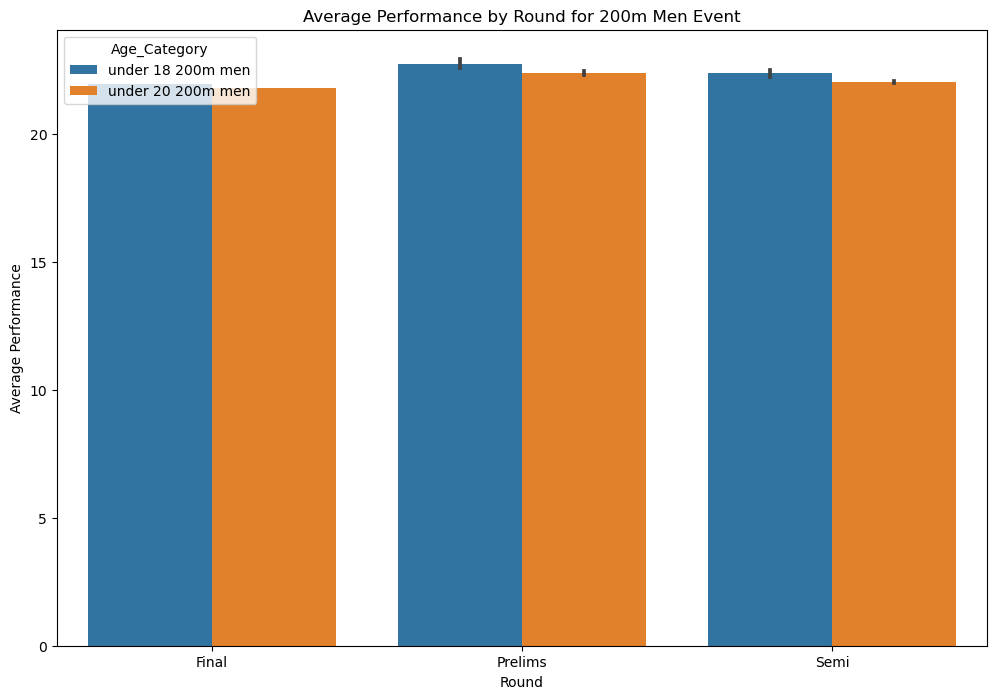

In [120]:
# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Iterate over cleaned_dfs
for table_name, df in cleaned_dfs.items():
    # Check if the table is related to the 100m event and either under 18 or under 20
    if '200m' in table_name and ('under 18' in table_name or 'under 20' in table_name):
        # Group by relevant columns for analysis
        grouped_data = df.groupby(['Round', 'Heatnumber'])

        # Calculate the mean performance for each group
        mean_performance = grouped_data['Performance'].mean().reset_index()

        # Add a column for the age category
        mean_performance['Age_Category'] = table_name

        # Append the data to the combined DataFrame
        combined_df = combined_df.append(mean_performance)

# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Round', y='Performance', hue='Age_Category', data=combined_df)

# Show the plot
plt.title('Average Performance by Round for 200m Men Event')
plt.xlabel('Round')
plt.ylabel('Average Performance')
plt.show()

C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\3888089324.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)
C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\3888089324.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)


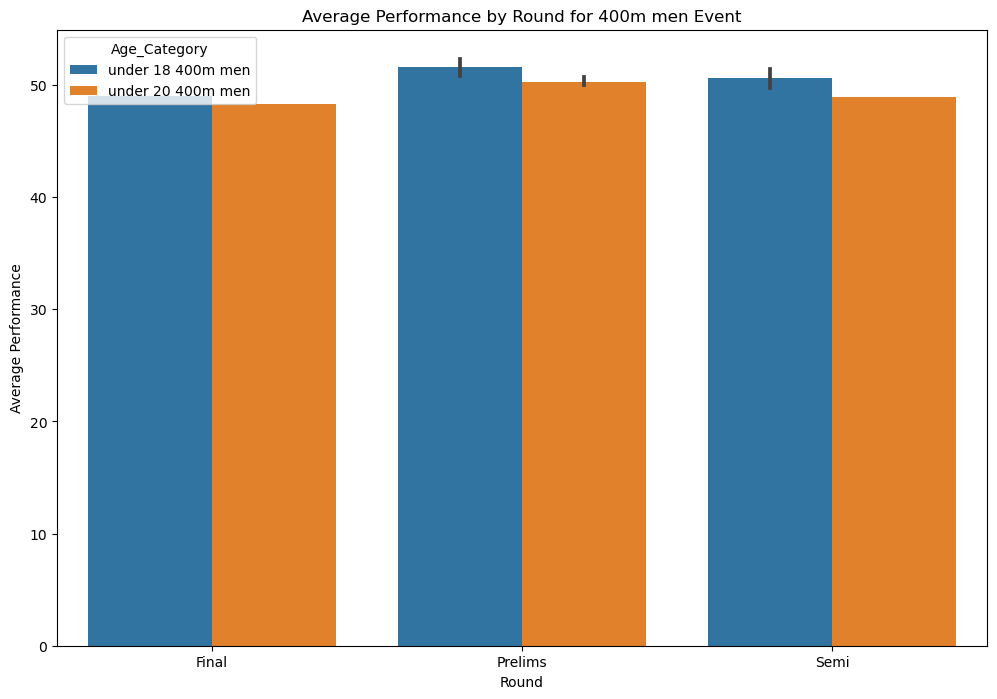

In [121]:
# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Iterate over cleaned_dfs
for table_name, df in cleaned_dfs.items():
    # Check if the table is related to the 100m event and either under 18 or under 20
    if '400m' in table_name and ('under 18' in table_name or 'under 20' in table_name):
        #Fixing the semis issue
        df['Round'] = df['Round'].str.replace('Semis', 'Semi', regex=True)
        
        # Group by relevant columns for analysis
        grouped_data = df.groupby(['Round', 'Heatnumber'])

        # Calculate the mean performance for each group
        mean_performance = grouped_data['Performance'].mean().reset_index()

        # Add a column for the age category
        mean_performance['Age_Category'] = table_name

        # Append the data to the combined DataFrame
        combined_df = combined_df.append(mean_performance)

# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Round', y='Performance', hue='Age_Category', data=combined_df)

# Show the plot
plt.title('Average Performance by Round for 400m men Event')
plt.xlabel('Round')
plt.ylabel('Average Performance')
plt.show()

In [44]:
cleaned_dfs.keys()

dict_keys(['under 18 100m men', 'under 18 200m men', 'under 18 400m men', 'under 20 100m men', 'under 20 200m men', 'under 20 400m men', 'Women U18 100m', 'Women U18 200m', 'Women U20 100m', 'Women u20 200m', 'Women u20 400m'])

C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\1781101488.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)
C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\1781101488.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)


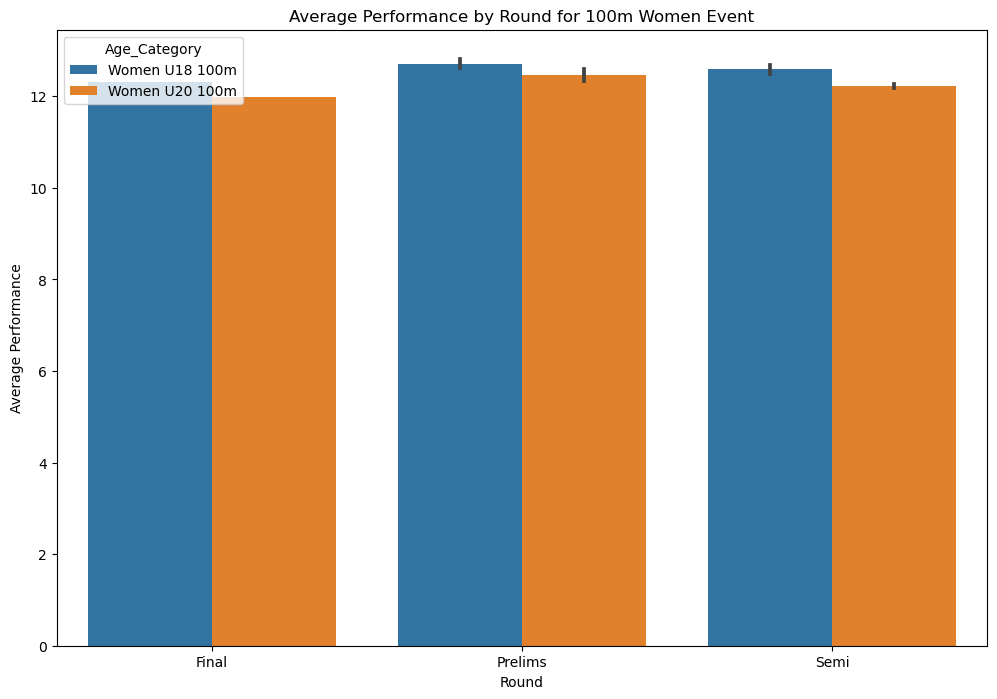

In [122]:
#Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Iterate over cleaned_dfs
for table_name, df in cleaned_dfs.items():
    # Check if the table is related to the 100m event and either under 18 or under 20
    if '100m' in table_name and ('U18' in table_name or 'U20' in table_name):
        #Fixing the semis issue
        df['Round'] = df['Round'].str.replace('Semis', 'Semi', regex=True)
        
        # Group by relevant columns for analysis
        grouped_data = df.groupby(['Round', 'Heatnumber'])

        # Calculate the mean performance for each group
        mean_performance = grouped_data['Performance'].mean().reset_index()

        # Add a column for the age category
        mean_performance['Age_Category'] = table_name

        # Append the data to the combined DataFrame
        combined_df = combined_df.append(mean_performance)

# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Round', y='Performance', hue='Age_Category', data=combined_df)

# Show the plot
plt.title('Average Performance by Round for 100m Women Event')
plt.xlabel('Round')
plt.ylabel('Average Performance')
plt.show()

C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\3674117128.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)
C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\3674117128.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)


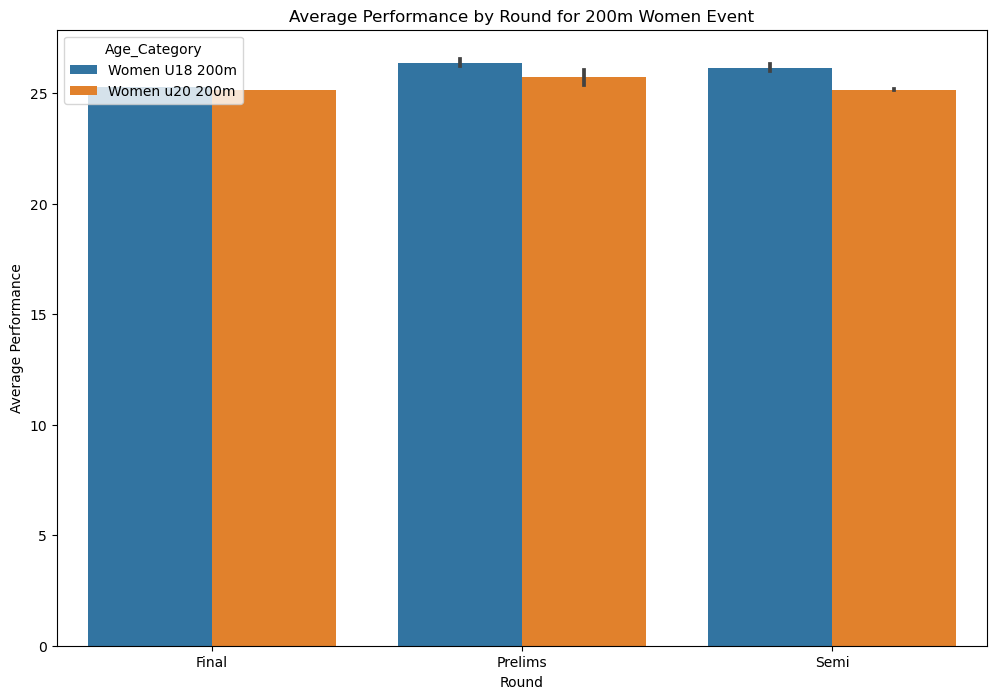

In [123]:
#Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Iterate over cleaned_dfs
for table_name, df in cleaned_dfs.items():
    # Check if the table is related to the 100m event and either under 18 or under 20
    if '200m' in table_name and ('U18' in table_name or 'u20' in table_name):
        #Fixing the semis issue and dropping null values
        df['Round'] = df['Round'].str.replace('Finals', 'Final', regex=True)
        df['Round'] = df['Round'].str.replace('Semis', 'Semi', regex=True)
        
        #df = df.dropna(subset=['Round'])
        df.dropna(inplace=True)
        
        # Group by relevant columns for analysis
        grouped_data = df.groupby(['Round', 'Heatnumber'])

        # Calculate the mean performance for each group
        mean_performance = grouped_data['Performance'].mean().reset_index()

        # Add a column for the age category
        mean_performance['Age_Category'] = table_name

        # Append the data to the combined DataFrame
        combined_df = combined_df.append(mean_performance)

# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Round', y='Performance', hue='Age_Category', data=combined_df)

# Show the plot
plt.title('Average Performance by Round for 200m Women Event')
plt.xlabel('Round')
plt.ylabel('Average Performance')
plt.show()

In [ ]:
for df_name,df in cleaned_dfs.items(): # corection made - wrong traversal of dictionaries
    
    #Renaming round type column in some tables to round
    
    if 'Round type' in cleaned_dfs[df_name].columns:
        cleaned_dfs[df_name].rename(columns = {'Round type':'Round'}, inplace = True)
        
    df.columns = df.columns.str.strip()
        
    #print(df_name)
    print(f"DataFrame: {df_name}")
    print(f"Columns: {df.columns}")
    
    #replace semis with semi 
    if 'Round' in df.columns:
        df['Round'] = df['Round'].str.replace('Semis', 'Semi', regex=True)
        
    if 'Reaction time' in cleaned_dfs[df_name].columns:
        grped = df.groupby(['Round'])[['Reaction time']].describe() 
        # when passing multiple columns , it shd be within another list
        grped1 = df.groupby(['Round'])[['Performance']].describe()
        print(grped)
        print(grped1)
    else:
        grped = df.groupby(['Round'])['Performance'].describe()
        print(grped)

In [55]:
cleaned_dfs.keys()

dict_keys(['under 18 100m men', 'under 18 200m men', 'under 18 400m men', 'under 20 100m men', 'under 20 200m men', 'under 20 400m men', 'Women U18 100m', 'Women U18 200m', 'Women U20 100m', 'Women u20 200m', 'Women u20 400m'])

# Gender analysis

C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\4121968628.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)
C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\4121968628.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)
C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\4121968628.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_performance)
C:\Users\Mahi\AppData\Local\Temp\ipykernel_12972\4121968628.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(mean_p

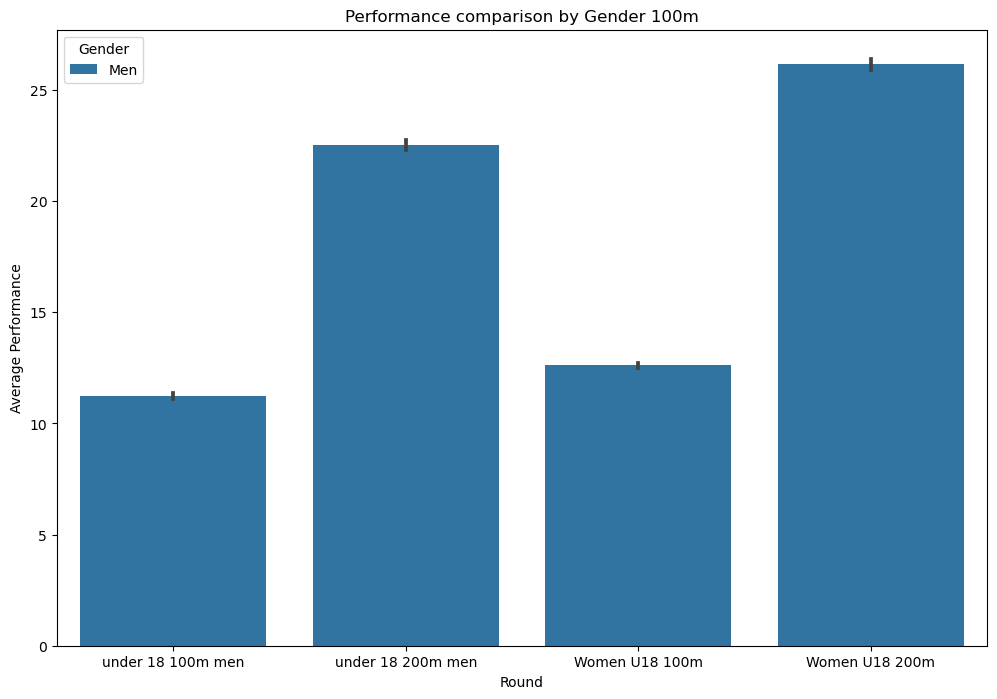

In [124]:
# Under 18
# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Iterate over cleaned_dfs
for table_name, df in cleaned_dfs.items():
    # Check if the table is related to the 100m or 200m event and either under 18 or under 20
    if ('100m' in table_name or '200m' in table_name) and ('U18' in table_name or 'under 18' in table_name):
        # Fixing the semis issue and dropping null values
        df['Round'] = df['Round'].str.replace('Finals', 'Final', regex=True)
        df['Round'] = df['Round'].str.replace('Semis', 'Semi', regex=True)

        # Drop NaN values
        df.dropna(inplace=True)

        # Group by relevant columns for analysis
        grouped_data = df.groupby(['Round', 'Heatnumber'])

        # Extract gender information from the table name
        gender = 'Men' if 'men' in table_name else 'Women'

        # Calculate the mean performance for each group
        mean_performance = grouped_data['Performance'].mean().reset_index()

        # Add columns for the age category and gender
        mean_performance['Age_Category'] = table_name
        mean_performance['Gender'] = gender

        # Append the data to the combined DataFrame
        combined_df = combined_df.append(mean_performance)

# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Age_Category', y='Performance', hue='Gender', data=combined_df)

# Show the plot
plt.title('Performance comparison by Gender 100m')
plt.xlabel('Round')
plt.ylabel('Average Performance')
plt.show()


In [59]:
cleaned_dfs['under 18 100m men']

1,Name,DOB,State,Reaction time,Performance,Round,Heatnumber
0,ANSHU RAJAK,2007-07-14,UTTAR PRADESH,0.2,10.67,Final,1
1,JASON CASTELINO,2006-11-12,MAHARASHTRA,0.2,10.81,Final,1
2,J.GOKUL PANDIYAN,2006-04-01,TAMIL NADU,0.2,10.82,Final,1
3,GOWTHAM ALLURI,2005-12-28,TELANGANA,0.2,10.84,Final,1
4,SANGINENI HARSH VARDHA,2006-12-19,TELANGANA,0.2,10.86,Final,1
...,...,...,...,...,...,...,...
58,JASON CASTELINO,2006-11-12,MAHARASHTRA,1.1,10.94,Prelims,5
59,SANGINENI HARSH VARDHA,2006-12-19,TELANGANA,1.1,11.03,Prelims,5
60,PRATIK MAHARANA,2007-08-06,ODISHA,1.1,11.10,Prelims,5
61,AYUSH KRISHNA .,2007-05-28,KERALA,1.1,11.22,Prelims,5


# Winner Analysis

In [125]:
# Replace any occurrence of 'RIYA PATIL'  with 'RIYA PATIL'
cleaned_dfs['Women u20 400m']['Name'] = cleaned_dfs['Women u20 400m']['Name'].replace(to_replace=r'.*RIYA PATIL.*', value='RIYA PATIL', regex=True)

In [ ]:
df['Name'] = df['Name'].replace(to_replace=r'.*RIYA PATIL.*', value='RIYA PATIL', regex=True)


In [ ]:
df['Name'] = df['Name'].str.replace(r'RESULTS OF PRELIMS Heat \\n ', 'RIYA PATIL', regex=True)


In [126]:
cleaned_dfs['Women u20 400m']

,Name,DOB,State,Performance,Round,Heatnumber
0,ANUSHKA KUMBHAR,2005-04-05,MAHARASHTRA,55.15,Final,1
1,RIYA PATIL,2004-04-25,MAHARASHTRA,55.69,Final,1
2,PAVITHRA P,2005-07-19,TAMIL NADU,56.49,Final,1
3,SANDRA MOL SABU,2005-08-07,KERALA,56.67,Final,1
4,JEYAVINDHIYA JEGADISH,2005-11-01,TAMIL NADU,56.83,Final,1
5,MISHTHI KAJLA,2005-08-18,RAJASTHAN,56.83,Final,1
6,SHREEYA RAJESH,2005-05-15,KARNATAKA,57.69,Final,1
7,NAYANA JOSE,2004-04-13,KERALA,59.41,Final,1
8,nan,NaT,nan,NaN,nan,nan
9,nan,NaT,nan,NaN,nan,nan


In [129]:
winner_df = {}
for table_name,df in cleaned_dfs.items():
    
    #Final and Semi values are inconsistent -handling them
    df['Round'] = df['Round'].str.replace('Finals', 'Final', regex=True)
    df['Round'] = df['Round'].str.replace('Semis', 'Semi', regex=True)
    
    #Extracting the winners - they are the top 3 as from the original table
    print("TABLE NAME",table_name)
    winner_list = list(df['Name'][:3])
    #print(winner_list)
    mod_winner_list = [name.strip() for name in winner_list]
    #print(mod_winner_list)
    
    #Initialzing multiple lists
    heat_list,semi_list,final_list = ([] for i in range(3))
    
    for i in range(3):
        Name = mod_winner_list[i]
        #heat_val = df.loc[(df['Round'] == 'Heat') & (df['Name'].str.strip == Name)].values[0] - my code
        #semi_val = df.loc[(df['Round'] == 'Semi') & (df['Name'].str.strip == Name)].values[0]
        #final_val = df.loc[(df['Round'] == 'Final') & (df['Name'].str.strip == Name)].values[0]
        #print("NAME:",Name)
        # Check if values exist in the 'Round' column before trying to filter them
        if 'Prelims' in df['Round'].values:
            #print("in heat")
            heat_val = df.loc[(df['Name'].str.strip() == Name) & (df['Round'] == 'Prelims'), 'Performance'].values[0]
            #print(heat_val)
            heat_list.append(heat_val)

        if 'Semi' in df['Round'].values:
            #print("in semi")
            
            semi_val = df.loc[(df['Name'].str.strip() == Name) & (df['Round'] == 'Semi'), 'Performance'].values[0]
            #print(semi_val)
            semi_list.append(semi_val)
        else:
            semi_list.append(0)

        if 'Final' in df['Round'].values:
            #print("in final")
            final_val = df.loc[(df['Name'].str.strip() == Name) & (df['Round'] == 'Final'), 'Performance'].values[0]
            #print(final_val)
            final_list.append(final_val)
        
        
        
        
        #print("heat,semi,final:",len(heat_list),len(semi_list),len(final_list))
        #print("heat,semi,final:",heat_list,semi_list,final_list)
        
    event_winner_df = pd.DataFrame({'Name':mod_winner_list,'Heat':heat_list,'Semi':semi_list,'Final':final_list})
    heat_list,semi_list,final_list = ([] for i in range(3))
    print(event_winner_df)
    winner_df[table_name] = event_winner_df

TABLE NAME under 18 100m men
               Name   Heat   Semi  Final
0       ANSHU RAJAK  10.64  10.63  10.67
1   JASON CASTELINO  10.94  10.90  10.81
2  J.GOKUL PANDIYAN  10.85  11.00  10.82
TABLE NAME under 18 200m men
               Name   Heat   Semi  Final
0       ANSHU RAJAK  21.88  21.95  21.68
1          SHIVAM .  21.87  21.78  21.71
2  J.GOKUL PANDIYAN  21.95  21.83  21.74
TABLE NAME under 18 400m men
          Name   Heat   Semi  Final
0     SHARAN M  49.95  48.53  48.18
1      VIKAS .  49.99  49.24  48.47
2  PRATEEK D .  49.98  49.28  48.49
TABLE NAME under 20 100m men
                     Name   Heat   Semi  Final
0              ANURAG C V  10.46  10.64  10.50
1              HARSH RAUT  10.48  10.49  10.54
2  DONDAPATI MRUTY JAYARA  10.76  10.52  10.58
TABLE NAME under 20 200m men
             Name   Heat   Semi  Final
0  VEERESH MATHUR  21.70  21.26  21.30
1       VISHAL TK  21.56  21.59  21.54
2       LAKSHAY .  21.58  21.43  21.54
TABLE NAME under 20 400m men
          

In [75]:
winner_df.keys()

dict_keys(['under 18 100m men', 'under 18 200m men', 'under 18 400m men', 'under 20 100m men', 'under 20 200m men', 'under 20 400m men', 'Women U18 100m', 'Women U18 200m', 'Women U20 100m', 'Women u20 200m', 'Women u20 400m'])

In [96]:
winner_df['under 18 200m men']

,Name,Heat,Semi,Final
0,ANSHU RAJAK,21.88,21.95,21.68
1,SHIVAM .,21.87,21.78,21.71
2,J.GOKUL PANDIYAN,21.95,21.83,21.74


In [ ]:
for table_name,df in winner_df.items():
    